In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the features of the real audios

real_df = pd.read_csv('/content/drive/My Drive/TMU MSC/MRP/real.csv')

In [ ]:
real_df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast
0,0.275288,0.045092,1738.300516,1707.138985,2999.477317,0.096746,-272.941437,117.712288,-58.640732,-22.545765,...,-8.223833,-4.230100,-15.028116,-12.888139,0.556058,-15.278888,-4.276763,-9.846510,-4.215582,23.972168
1,0.402192,0.030271,2145.587886,1855.629452,3667.251309,0.140625,-253.155472,105.866211,-56.574886,-8.882482,...,-12.231839,-9.413049,-6.454260,-10.961055,-1.163559,-13.523794,-5.133940,-10.052754,-1.330941,21.649029
2,0.444117,0.037623,1845.551653,1575.221010,3092.216908,0.108565,-209.400894,112.153885,-90.437363,-21.150068,...,-5.969281,-3.684605,-6.730222,-7.022470,-3.923699,-5.221250,-3.371201,-3.821933,5.549218,20.793983
3,0.514603,0.055094,1789.470637,1476.508964,2944.910223,0.109197,-175.276566,113.275299,-101.395729,-27.198601,...,-1.064202,-1.583214,-10.060043,-10.302517,-1.231883,-5.259712,-0.885568,-2.509597,1.253687,21.258674
4,0.501559,0.046054,1722.545602,1516.182694,2738.387229,0.102961,-195.784821,118.154854,-89.930183,-31.717480,...,1.089545,-1.258821,-6.128263,-12.781674,-3.955111,-6.138294,1.730279,-0.002251,1.786903,21.468434


In [ ]:
real_df.shape

(14968, 27)

In [ ]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14968 entries, 0 to 14967
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         14968 non-null  float64
 1   rms                 14968 non-null  float64
 2   spectral_centroid   14968 non-null  float64
 3   spectral_bandwidth  14968 non-null  float64
 4   rolloff             14968 non-null  float64
 5   zero_crossing_rate  14968 non-null  float64
 6   mfcc1               14968 non-null  float64
 7   mfcc2               14968 non-null  float64
 8   mfcc3               14968 non-null  float64
 9   mfcc4               14968 non-null  float64
 10  mfcc5               14968 non-null  float64
 11  mfcc6               14968 non-null  float64
 12  mfcc7               14968 non-null  float64
 13  mfcc8               14968 non-null  float64
 14  mfcc9               14968 non-null  float64
 15  mfcc10              14968 non-null  float64
 16  mfcc

In [ ]:

pd.set_option('display.max_columns', None)


In [ ]:
real_df_stats = real_df.describe()

# Extract mean and standard deviation
means = real_df_stats.loc['mean']
stds = real_df_stats.loc['std']

#  mean and standard deviation for the features for real audios
stat = pd.DataFrame({'Mean': means, 'Standard Deviation': stds})
print(stat)

                           Mean  Standard Deviation
chroma_stft            0.381502            0.087325
rms                    0.034303            0.028652
spectral_centroid   2185.921396          848.951248
spectral_bandwidth  1992.352384          528.924027
rolloff             4041.105245         1547.714281
zero_crossing_rate     0.121381            0.063374
mfcc1               -321.036592           89.129110
mfcc2                104.592636           47.580577
mfcc3                -25.473904           30.738104
mfcc4                  9.620926           20.076700
mfcc5                 -9.561334           16.702706
mfcc6                 -6.036344           10.310833
mfcc7                -14.184029           10.517786
mfcc8                 -8.293028           11.059674
mfcc9                 -8.998524            7.959683
mfcc10                -2.727373            8.595035
mfcc11                -5.874990            6.572323
mfcc12                -1.933784            6.254073
mfcc13      

In [ ]:
correlation_matrix = real_df.corr() # correlation among the features extracted from the real audios
correlation_matrix.style.background_gradient(cmap='coolwarm')

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast
chroma_stft,1.000000,-0.260616,0.218636,0.124828,0.212263,0.311578,-0.188500,-0.124913,-0.090450,-0.036937,-0.016915,0.209662,0.286656,0.331222,0.309368,0.222351,0.059471,0.119262,0.081225,0.111828,0.143711,0.071391,0.150625,0.226167,0.153612,0.108928,-0.777281
rms,-0.260616,1.000000,-0.527396,-0.593137,-0.530420,-0.445855,0.679001,0.604502,-0.053443,0.369269,0.431877,-0.188708,0.203968,-0.449579,0.000338,-0.098268,0.109404,0.157218,0.313463,0.174492,0.342498,0.322307,0.406715,-0.024196,0.370882,0.058038,0.199826
spectral_centroid,0.218636,-0.527396,1.000000,0.874884,0.973248,0.944150,-0.175391,-0.936552,0.393219,-0.185871,-0.290086,0.009638,-0.314260,0.286334,-0.213286,-0.149742,-0.453155,-0.404491,-0.493798,-0.374758,-0.374607,-0.407405,-0.425319,0.004011,-0.365642,-0.163238,-0.059123
spectral_bandwidth,0.124828,-0.593137,0.874884,1.000000,0.931148,0.696563,-0.259357,-0.896295,0.539634,-0.175343,-0.166338,0.138020,-0.305094,0.362814,-0.201535,-0.102672,-0.381834,-0.341208,-0.445952,-0.277613,-0.300141,-0.337642,-0.424217,0.099314,-0.367858,-0.129997,0.001907
rolloff,0.212263,-0.530420,0.973248,0.931148,1.000000,0.871574,-0.213990,-0.915999,0.479982,-0.109230,-0.228875,0.059276,-0.307057,0.274725,-0.198408,-0.157332,-0.417189,-0.373857,-0.465106,-0.321382,-0.326361,-0.369240,-0.378155,0.036527,-0.330016,-0.131396,-0.077035
zero_crossing_rate,0.311578,-0.445855,0.944150,0.696563,0.871574,1.000000,-0.137434,-0.826750,0.254416,-0.202175,-0.323989,-0.038139,-0.262726,0.214555,-0.174212,-0.151689,-0.428584,-0.387543,-0.451233,-0.381506,-0.366877,-0.381628,-0.369778,-0.049486,-0.314008,-0.161190,-0.140164
mfcc1,-0.188500,0.679001,-0.175391,-0.259357,-0.213990,-0.137434,1.000000,0.165507,-0.216738,0.013397,0.117038,-0.327927,-0.036126,-0.184825,-0.052950,-0.103090,-0.095510,-0.085843,0.012004,-0.020737,0.159673,0.084034,0.115410,0.041854,0.153512,-0.008695,0.240517
mfcc2,-0.124913,0.604502,-0.936552,-0.896295,-0.915999,-0.826750,0.165507,1.000000,-0.276583,0.319076,0.370519,-0.014287,0.358129,-0.386251,0.230180,0.115628,0.478977,0.425217,0.527940,0.389037,0.401191,0.429597,0.497873,-0.043906,0.420843,0.133333,-0.034543
mfcc3,-0.090450,-0.053443,0.393219,0.539634,0.479982,0.254416,-0.216738,-0.276583,1.000000,0.456958,0.386280,0.232755,-0.061678,-0.040959,-0.184852,-0.160559,-0.069256,-0.064465,-0.024671,0.000372,0.051801,-0.022324,-0.033294,0.059076,-0.057019,-0.123871,0.106220
mfcc4,-0.036937,0.369269,-0.185871,-0.175343,-0.109230,-0.202175,0.013397,0.319076,0.456958,1.000000,0.556088,0.051313,0.154977,-0.317367,0.163458,-0.126736,0.179172,0.189490,0.274850,0.262453,0.345512,0.163599,0.388783,0.051059,0.273394,0.062764,-0.000018


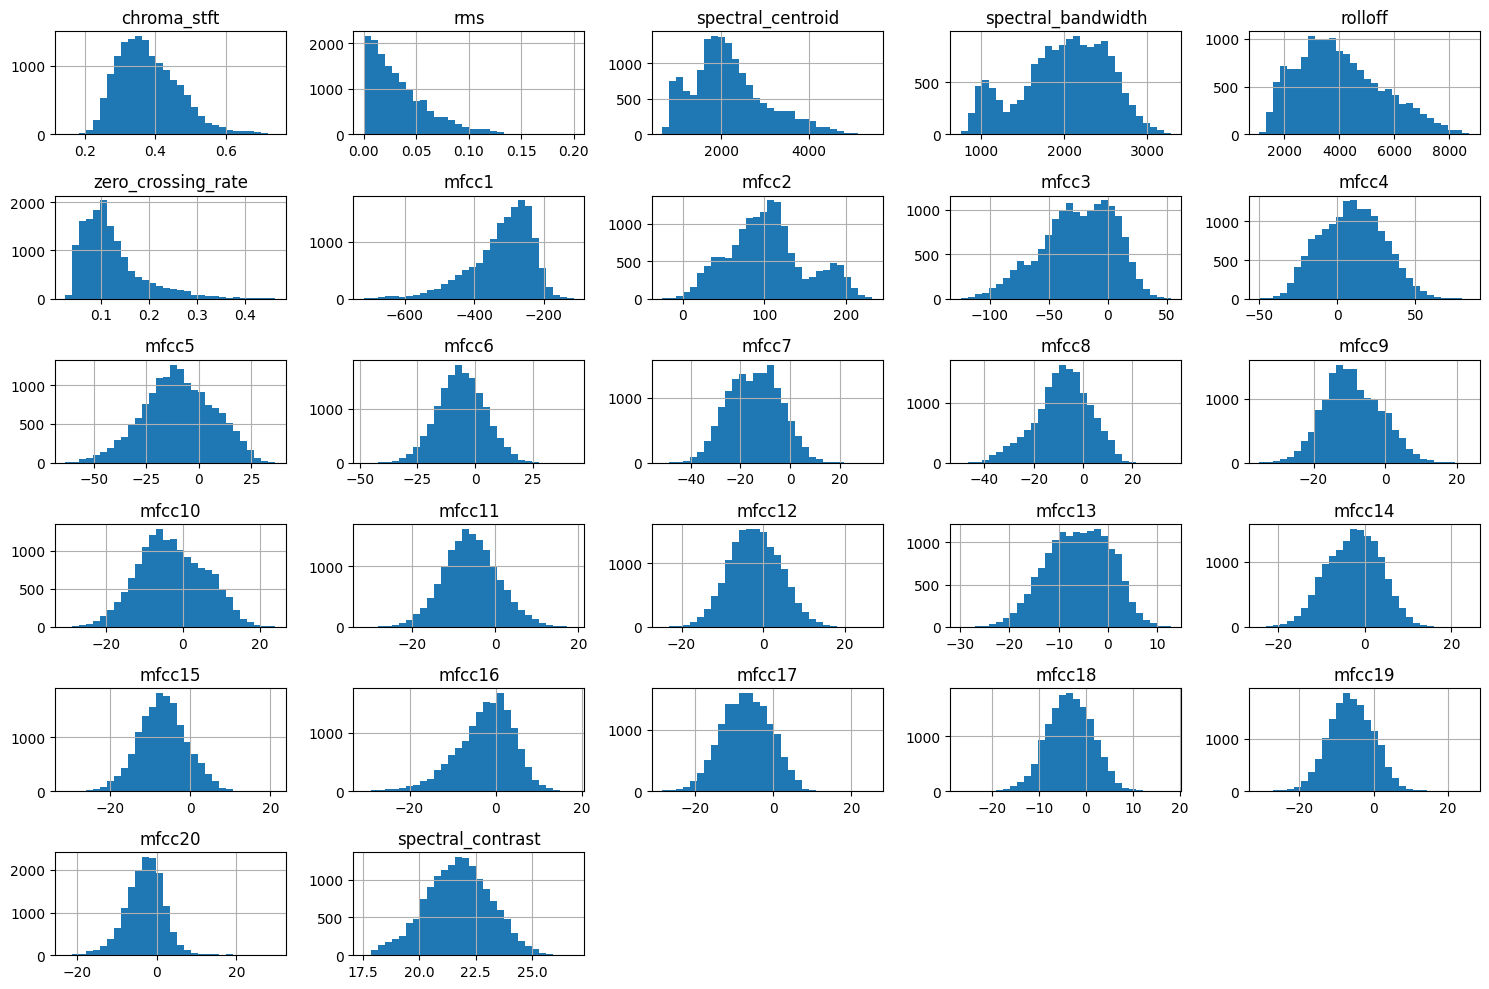

In [ ]:
real_df.hist(bins=30, figsize=(15, 10)) # data distribution for the features in the real audios
plt.tight_layout()
plt.show()

In [ ]:
#reading the extracted feautures from the fake audio data
fake_df = pd.read_csv('/content/drive/My Drive/TMU MSC/MRP/fake.csv')

In [ ]:
fake_df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast
0,0.326697,0.123700,1777.942498,1837.112762,2827.456388,0.107122,-225.333344,122.697121,-11.105057,-9.431670,...,-9.733364,-3.241045,-11.045048,-5.105941,-8.606029,-14.024221,-10.234992,-7.024734,-10.441502,25.362191
1,0.456369,0.061118,2770.517572,2087.866928,4390.326483,0.191939,-248.136414,90.604706,-17.020790,-16.921568,...,-4.886596,-5.352135,-1.861653,-5.858721,-4.962570,-8.021612,-2.174608,-5.835966,-9.264341,22.605168
2,0.439279,0.036900,1536.018911,1354.984799,2204.461670,0.098810,-251.911316,148.532516,-87.152779,-51.684898,...,0.161706,-15.080646,3.363776,-11.732368,-1.649680,-5.385772,-4.069556,-1.495341,2.644380,20.343531
3,0.486760,0.053563,1589.997260,1340.286377,2237.250866,0.102151,-205.790100,129.722672,-100.581757,-53.443851,...,-2.658189,-8.526023,-2.834571,-16.885719,1.259422,-3.710742,-3.283498,1.299076,3.501615,20.861829
4,0.525130,0.042922,1681.218198,1475.558551,2487.329656,0.104315,-220.470703,110.974602,-100.727852,-50.382095,...,-0.106546,-4.763867,-3.660638,-17.474842,-3.870730,-7.393351,2.094621,-1.436306,3.634926,21.141037


In [ ]:

fake_df_stats = fake_df.describe()

# Extract mean and standard deviation
fake_means = fake_df_stats.loc['mean']
fake_stds = fake_df_stats.loc['std']

# Print the mean and standard deviation
fake_stat = pd.DataFrame({'Mean': fake_means, 'Standard Deviation': fake_stds})
print(fake_stat)

                           Mean  Standard Deviation
chroma_stft            0.404517            0.089337
rms                    0.047544            0.033097
spectral_centroid   2251.027860          628.519415
spectral_bandwidth  2157.173361          356.672116
rolloff             4172.632229         1214.869102
zero_crossing_rate     0.120770            0.054501
mfcc1               -308.358857           87.175546
mfcc2                 95.883996           29.001751
mfcc3                -10.136479           25.068500
mfcc4                 12.690167           17.589932
mfcc5                 -1.214234           18.471197
mfcc6                 -2.664074           10.951048
mfcc7                -10.304821            8.918327
mfcc8                 -6.077815            8.417838
mfcc9                 -9.738345            7.974917
mfcc10                -0.843578            7.668514
mfcc11                -4.770597            7.752893
mfcc12                -2.858215            6.158619
mfcc13      

In [ ]:
fake_df_correlation_matrix = fake_df.corr() # correlation among the features in the fake audios
fake_df_correlation_matrix.style.background_gradient(cmap='coolwarm')

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast
chroma_stft,1.000000,-0.606964,0.411192,0.382417,0.459574,0.432530,-0.434284,-0.227171,0.026793,-0.011992,-0.002089,0.324880,0.378414,0.364044,0.431946,0.328059,0.312001,0.287219,0.154102,0.329919,0.205412,0.089105,0.416789,0.308808,0.206342,0.277073,-0.805031
rms,-0.606964,1.000000,-0.271077,-0.281346,-0.326834,-0.300560,0.746986,0.107695,0.019628,0.011744,-0.022974,-0.334486,-0.370767,-0.480598,-0.509061,-0.268086,-0.415883,-0.264105,-0.161483,-0.451459,-0.244267,-0.160573,-0.419108,-0.311854,-0.215527,-0.249372,0.721765
spectral_centroid,0.411192,-0.271077,1.000000,0.782839,0.956861,0.936967,-0.173785,-0.888231,0.207091,-0.009727,-0.020151,0.200644,0.023222,-0.046744,-0.005747,-0.078549,0.019229,-0.101048,-0.194384,0.100241,0.003672,0.058061,-0.020869,0.175412,-0.058709,-0.028743,-0.381490
spectral_bandwidth,0.382417,-0.281346,0.782839,1.000000,0.889106,0.587078,-0.255466,-0.709409,0.471454,0.057483,0.244536,0.248033,0.104954,-0.068888,0.020995,-0.210860,0.148767,-0.080981,-0.122791,0.120044,0.096454,0.158486,-0.041402,0.132204,-0.044810,-0.001159,-0.417518
rolloff,0.459574,-0.326834,0.956861,0.889106,1.000000,0.833136,-0.255135,-0.845182,0.264002,0.031898,0.054591,0.222338,0.092865,-0.020084,0.019974,-0.069222,0.077791,-0.056370,-0.141585,0.146123,0.050426,0.110511,0.026528,0.183971,-0.009184,0.016506,-0.446312
zero_crossing_rate,0.432530,-0.300560,0.936967,0.587078,0.833136,1.000000,-0.194502,-0.771904,0.099292,-0.075376,-0.109687,0.156481,0.028032,-0.016520,0.003559,0.005440,-0.021293,-0.071863,-0.204139,0.086563,-0.058588,-0.004035,0.013887,0.161553,-0.064379,-0.019689,-0.372120
mfcc1,-0.434284,0.746986,-0.173785,-0.255466,-0.255135,-0.194502,1.000000,0.063819,-0.177576,-0.103770,-0.152698,-0.267076,-0.348792,-0.319906,-0.302664,-0.187111,-0.231272,-0.196442,-0.118032,-0.284990,-0.214667,-0.065581,-0.292628,-0.173100,-0.146263,-0.041375,0.483431
mfcc2,-0.227171,0.107695,-0.888231,-0.709409,-0.845182,-0.771904,0.063819,1.000000,-0.121654,-0.003185,0.087804,-0.163248,0.080777,0.060177,0.057822,0.162695,0.057817,0.182687,0.214019,-0.014079,-0.039064,-0.025089,0.123745,-0.185860,0.072076,0.120635,0.235878
mfcc3,0.026793,0.019628,0.207091,0.471454,0.264002,0.099292,-0.177576,-0.121654,1.000000,0.513664,0.494662,0.392238,-0.052381,-0.230572,-0.106697,-0.308280,0.026543,-0.081456,-0.049964,-0.085586,0.110544,0.128224,-0.060317,-0.048084,-0.082784,-0.095401,-0.007124
mfcc4,-0.011992,0.011744,-0.009727,0.057483,0.031898,-0.075376,-0.103770,-0.003185,0.513664,1.000000,0.648460,0.309895,-0.058284,-0.153378,0.037324,-0.105324,-0.028772,0.078164,0.134206,0.048266,0.232652,0.232985,0.129788,-0.003390,0.171695,0.095638,0.059752


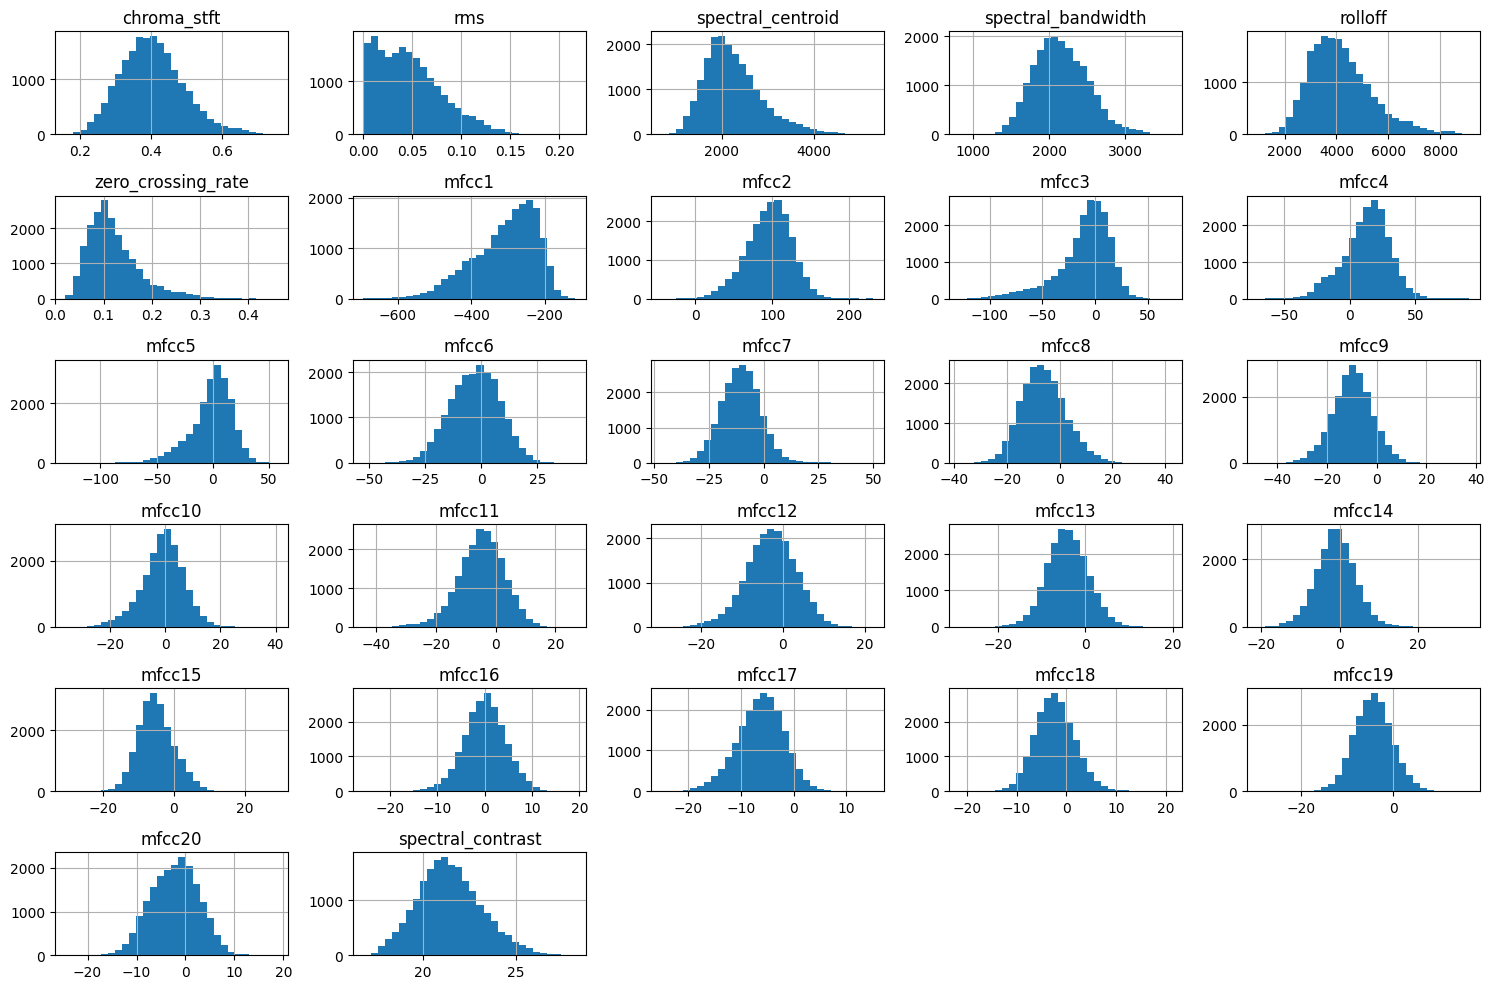

In [ ]:
fake_df.hist(bins=30, figsize=(15, 10)) # data ditribution of the features in the fake audios
plt.tight_layout()
plt.show()

# **t- test **
Identifing  statistically significant diffrence between the variables in the real and fake classes

In [ ]:
# t test to see any diiference between the variavles for the real and fake audios
from scipy.stats import ttest_ind
numerical_columns = real_df.select_dtypes("float").columns


for col in numerical_columns:
    t_stat, p_value = ttest_ind(real_df[col], fake_df[col])
    print(f'T-test for {col}: t-statistic = {t_stat}, p-value = {p_value}')

T-test for chroma_stft: t-statistic = -23.91027448111062, p-value = 2.5377678170998873e-125
T-test for rms: t-statistic = -38.95783357906481, p-value = 0.0
T-test for spectral_centroid: t-statistic = -8.166207822064768, p-value = 3.2900491248208913e-16
T-test for spectral_bandwidth: t-statistic = -34.4215469302582, p-value = 2.6543326729401427e-255
T-test for rolloff: t-statistic = -8.824551776236973, p-value = 1.1497906273595673e-18
T-test for zero_crossing_rate: t-statistic = 0.9587607838631025, p-value = 0.33768601644154517
T-test for mfcc1: t-statistic = -13.235894703961783, p-value = 6.819014562464704e-40
T-test for mfcc2: t-statistic = 20.94032143747628, p-value = 9.264966759116223e-97
T-test for mfcc3: t-statistic = -50.92287037712643, p-value = 0.0
T-test for mfcc4: t-statistic = -15.073594842658538, p-value = 3.5234459778613174e-51
T-test for mfcc5: t-statistic = -43.28763567596997, p-value = 0.0
T-test for mfcc6: t-statistic = -29.028929775282585, p-value = 4.64123873001168e-

## ** Dataset Creation**


In [ ]:
#creating an additional column as the label : real =0 , fake =1
real_df["label"]= 0
fake_df["label"]= 1

In [ ]:
real_df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast,label
0,0.275288,0.045092,1738.300516,1707.138985,2999.477317,0.096746,-272.941437,117.712288,-58.640732,-22.545765,...,-4.230100,-15.028116,-12.888139,0.556058,-15.278888,-4.276763,-9.846510,-4.215582,23.972168,0
1,0.402192,0.030271,2145.587886,1855.629452,3667.251309,0.140625,-253.155472,105.866211,-56.574886,-8.882482,...,-9.413049,-6.454260,-10.961055,-1.163559,-13.523794,-5.133940,-10.052754,-1.330941,21.649029,0
2,0.444117,0.037623,1845.551653,1575.221010,3092.216908,0.108565,-209.400894,112.153885,-90.437363,-21.150068,...,-3.684605,-6.730222,-7.022470,-3.923699,-5.221250,-3.371201,-3.821933,5.549218,20.793983,0
3,0.514603,0.055094,1789.470637,1476.508964,2944.910223,0.109197,-175.276566,113.275299,-101.395729,-27.198601,...,-1.583214,-10.060043,-10.302517,-1.231883,-5.259712,-0.885568,-2.509597,1.253687,21.258674,0
4,0.501559,0.046054,1722.545602,1516.182694,2738.387229,0.102961,-195.784821,118.154854,-89.930183,-31.717480,...,-1.258821,-6.128263,-12.781674,-3.955111,-6.138294,1.730279,-0.002251,1.786903,21.468434,0


In [ ]:
len(real_df)

14968

In [ ]:
len(fake_df)

19389

In [ ]:
#combining the both real and fake dat frames to get a final dataframe
combined_df = pd.concat([real_df, fake_df])

In [ ]:
len(combined_df)

34357

In [ ]:
combined_df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast,label
0,0.275288,0.045092,1738.300516,1707.138985,2999.477317,0.096746,-272.941437,117.712288,-58.640732,-22.545765,...,-4.230100,-15.028116,-12.888139,0.556058,-15.278888,-4.276763,-9.846510,-4.215582,23.972168,0
1,0.402192,0.030271,2145.587886,1855.629452,3667.251309,0.140625,-253.155472,105.866211,-56.574886,-8.882482,...,-9.413049,-6.454260,-10.961055,-1.163559,-13.523794,-5.133940,-10.052754,-1.330941,21.649029,0
2,0.444117,0.037623,1845.551653,1575.221010,3092.216908,0.108565,-209.400894,112.153885,-90.437363,-21.150068,...,-3.684605,-6.730222,-7.022470,-3.923699,-5.221250,-3.371201,-3.821933,5.549218,20.793983,0
3,0.514603,0.055094,1789.470637,1476.508964,2944.910223,0.109197,-175.276566,113.275299,-101.395729,-27.198601,...,-1.583214,-10.060043,-10.302517,-1.231883,-5.259712,-0.885568,-2.509597,1.253687,21.258674,0
4,0.501559,0.046054,1722.545602,1516.182694,2738.387229,0.102961,-195.784821,118.154854,-89.930183,-31.717480,...,-1.258821,-6.128263,-12.781674,-3.955111,-6.138294,1.730279,-0.002251,1.786903,21.468434,0


In [ ]:
combined_df.tail()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast,label
19384,0.330864,0.097884,2543.672344,2125.739007,4480.863814,0.132424,-204.883392,80.646156,-7.612321,9.690510,...,-8.909023,-10.236368,1.976552,-2.899849,-13.838990,-0.077225,-12.765158,-4.278091,23.634733,1
19385,0.413484,0.073468,2607.564834,2143.350553,4685.184548,0.147117,-294.621094,72.092613,-14.087472,5.530004,...,-6.631920,-7.370537,-4.744910,1.875944,-9.058198,-2.620905,-4.502171,-6.371037,20.278758,1
19386,0.297743,0.101417,2127.562612,2028.861010,3688.539817,0.115223,-232.656738,80.451767,-4.993309,19.716549,...,-8.110133,-3.748967,-10.297239,-7.865677,-11.061680,-1.459901,-9.315485,-8.044949,24.443158,1
19387,0.395382,0.056945,1890.136798,1775.316192,3074.109442,0.100963,-234.741760,112.962006,-37.970127,-19.678295,...,-8.596354,0.016248,-4.221364,-7.579969,-7.429428,1.610091,-1.949176,-0.887386,22.110390,1
19388,0.382538,0.034292,1532.452187,1567.337215,2203.972279,0.091053,-267.591278,129.505875,-49.898792,-43.221256,...,-6.260563,-4.476084,-3.773422,-8.191626,-7.683205,4.887568,2.960327,2.576299,20.490743,1


In [ ]:
#shuffling the final dataframe
final_df = combined_df.sample(frac=1, random_state=42)
final_df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,spectral_contrast,label
11890,0.499429,0.045906,1477.871452,1650.648672,2756.250000,0.060203,-347.903839,129.911545,-12.688540,35.006527,...,4.356218,8.751603,4.949977,0.441512,1.470134,3.997265,-0.351662,3.268352,21.671775,0
3,0.486760,0.053563,1589.997260,1340.286377,2237.250866,0.102151,-205.790100,129.722672,-100.581757,-53.443851,...,-8.526023,-2.834571,-16.885719,1.259422,-3.710742,-3.283498,1.299076,3.501615,20.861829,1
13697,0.283023,0.019542,1245.617540,1607.189807,2153.565008,0.039284,-372.478149,145.942841,-22.395941,6.288597,...,-9.829761,-7.139560,-7.890902,1.485827,-11.636086,-7.770608,-6.128963,-5.891862,24.880914,1
10600,0.704936,0.012575,3658.994010,2561.641643,6670.466561,0.261214,-237.726913,18.325443,-59.224773,-15.345366,...,-13.352977,-8.223192,-9.669504,-2.235290,-8.099798,-1.844251,-6.385151,-3.172643,18.112736,0
14001,0.388010,0.015539,3194.280182,2405.771778,5576.365523,0.180220,-331.307159,55.652039,8.687071,1.657524,...,-9.651941,-7.914859,-13.250055,-8.507153,-13.488628,-5.689762,-8.554969,-10.048347,21.739148,0


In [ ]:
final_df.shape

(34357, 28)

In [ ]:
value_count = final_df["label"].value_counts()
print(value_count)

label
1    19389
0    14968
Name: count, dtype: int64


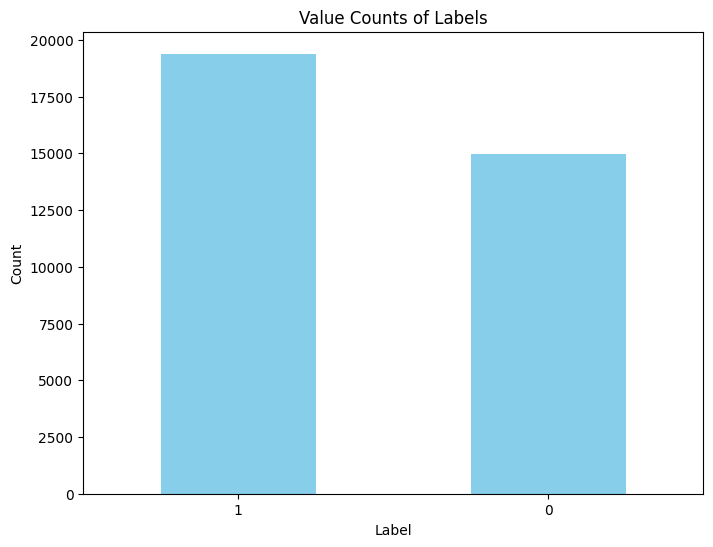

In [ ]:
plt.figure(figsize=(8, 6))
value_count.plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Counts of Labels')
plt.xticks(rotation=0)
plt.show()# need to resample real features

In [ ]:
#Saving the final datarame for further analysis and training
filepath = Path('/content/drive/My Drive/TMU MSC/MRP/final.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
final_df.to_csv(filepath, index = False)